In [1]:
import numpy as np
import pandas as pd

# Expected returns
# BTC
#Annualized Expected Return using Ensemble Model: 0.7611509621877798

# GOLD
#Annualized Expected Return using Ensemble Model: 0.04076087015620875


# SP500
#Annualized Expected Return using Ensemble Model: 0.10493734407301046

# US GOV BOND
#Annualized Expected Return using Ensemble Model: 0.033223592359817374



In [2]:
pip install yfinance numpy pandas scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.


## ACTUAL RETURNS PORTFOLIO

In [4]:
import yfinance as yf

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'Long-Term Treasuries (TLT)': 'TLT'
}

# Define the time period
start_date = '2017-01-01'
end_date = '2023-12-31'

# Loop through each asset and calculate the actual annualized return
for asset_name, ticker in assets.items():
    # Fetch historical data in daily timeframe
    asset_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Get the initial and final closing prices
    initial_price = asset_data['Close'].iloc[0]
    final_price = asset_data['Close'].iloc[-1]
    
    # Calculate the number of years
    n_years = (asset_data.index[-1] - asset_data.index[0]).days / 365.25
    
    # Calculate the cumulative return
    cumulative_return = final_price / initial_price - 1
    
    # Calculate the actual annualized return
    actual_annualized_return = (1 + cumulative_return) ** (1 / n_years) - 1
    
    # Convert to percentage
    actual_annualized_return_percentage = actual_annualized_return * 100
    
    # Print the results
    print(f"{asset_name} Actual Annualized Return (2017-2023): {actual_annualized_return_percentage:.2f}%")


[*********************100%%**********************]  1 of 1 completed


Bitcoin Actual Annualized Return (2017-2023): 70.80%


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


S&P 500 Actual Annualized Return (2017-2023): 11.30%
Gold (GLD) Actual Annualized Return (2017-2023): 8.17%


[*********************100%%**********************]  1 of 1 completed

Long-Term Treasuries (TLT) Actual Annualized Return (2017-2023): -2.69%


### COVARIANCE MATRIX

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'Long-Term Treasuries (TLT)': 'TLT'
}

# Define the time period
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Annualize the daily returns (assuming 252 trading days per year)
annualized_returns = daily_returns.mean() * 252

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Print the covariance matrix
print("Covariance Matrix of Annualized Returns:")
print(cov_matrix)


[*********************100%%**********************]  4 of 4 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\485246005.py:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Covariance Matrix of Annualized Returns:
Ticker    BTC-USD       GLD       TLT     ^GSPC
Ticker                                         
BTC-USD  0.376689  0.007253 -0.000317  0.022707
GLD      0.007253  0.012884  0.004688  0.001513
TLT     -0.000317  0.004688  0.017103 -0.004362
^GSPC    0.022707  0.001513 -0.004362  0.025696


### ACTUAL RETURNS PORTFOLIO

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'Long-Term Treasuries (TLT)': 'TLT'
}

# Define the time period
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the expected annual returns
expected_annual_returns = daily_returns.mean() * 252

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Function to calculate portfolio performance metrics
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to minimize the negative Sharpe ratio
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, returns, cov_matrix, risk_free_rate)[2]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: each weight is between 0 and 1
bounds = tuple((0, 1) for _ in range(len(assets)))

# Initial guess: equal distribution
initial_weights = np.array([1/len(assets)] * len(assets))

# Optimize portfolio for maximum Sharpe ratio
optimal_result = minimize(negative_sharpe_ratio, initial_weights, args=(expected_annual_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = optimal_result.x

# Calculate the optimal portfolio performance
optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, expected_annual_returns, cov_matrix, risk_free_rate)

# Display the results
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(optimal_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(optimal_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(optimal_sharpe))


[*********************100%%**********************]  4 of 4 completed

Optimal Portfolio Weights:
                        Asset    Weight
0                     Bitcoin  0.451465
1                     S&P 500  0.315713
2                  Gold (GLD)  0.000000
3  Long-Term Treasuries (TLT)  0.232822

Expected Annual Return: 29.00%
Portfolio Volatility (Annualized): 29.41%
Sharpe Ratio: 0.86



C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\441280986.py:22: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


## EXPECTED RETURNS PORTFOLIO
USING ENSENBLE MODEL OF LR + RF

In [10]:
# Define the expected returns for each asset using an Ensemble Model
expected_returns = {
    'Bitcoin (BTC)': 0.7611509621877798,
    'Gold (GLD)': 0.04076087015620875,
    'S&P 500 (SP500)': 0.10493734407301046,
    'US Gov Bond (TLT)': 0.033223592359817374
}

# Print the expected returns reference
print("Expected Returns Reference:")
for asset, return_value in expected_returns.items():
    print(f"{asset}:\nAnnualized Expected Return using Ensemble Model: {return_value}")


Expected Returns Reference:
Bitcoin (BTC):
Annualized Expected Return using Ensemble Model: 0.7611509621877798
Gold (GLD):
Annualized Expected Return using Ensemble Model: 0.04076087015620875
S&P 500 (SP500):
Annualized Expected Return using Ensemble Model: 0.10493734407301046
US Gov Bond (TLT):
Annualized Expected Return using Ensemble Model: 0.033223592359817374


### COVARIANCE MATRIX

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'Long-Term Treasuries (TLT)': 'TLT'
}

# Define the time period
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Annualize the daily returns (assuming 252 trading days per year)
annualized_returns = daily_returns.mean() * 252

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Print the covariance matrix
print("Covariance Matrix of Annualized Returns:")
print(cov_matrix)


[*********************100%%**********************]  4 of 4 completed


Covariance Matrix of Annualized Returns:
Ticker    BTC-USD       GLD       TLT     ^GSPC
Ticker                                         
BTC-USD  0.376689  0.007253 -0.000317  0.022707
GLD      0.007253  0.012884  0.004688  0.001513
TLT     -0.000317  0.004688  0.017103 -0.004362
^GSPC    0.022707  0.001513 -0.004362  0.025696


C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\485246005.py:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


### EXPECTED RETURN PORTFOLIO

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Function to calculate portfolio performance metrics
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to minimize the negative Sharpe ratio
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, returns, cov_matrix, risk_free_rate)[2]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: each weight is between 0 and 1
bounds = tuple((0, 1) for _ in range(len(assets)))

# Initial guess: equal distribution
initial_weights = np.array([1/len(assets)] * len(assets))

# Optimize portfolio for maximum Sharpe ratio
optimal_result = minimize(negative_sharpe_ratio, initial_weights, args=(expected_annual_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = optimal_result.x

# Calculate the optimal portfolio performance
optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, expected_annual_returns, cov_matrix, risk_free_rate)

# Display the results
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(optimal_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(optimal_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(optimal_sharpe))


[*********************100%%**********************]  4 of 4 completed

Optimal Portfolio Weights:
               Asset        Weight
0            Bitcoin  3.075686e-01
1            S&P 500  6.924314e-01
2         Gold (GLD)  3.751340e-17
3  US Gov Bond (TLT)  3.024230e-17

Expected Annual Return: 30.68%
Portfolio Volatility (Annualized): 21.19%
Sharpe Ratio: 1.27



C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\1772797076.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Dollar Allocations in a $100,000 Portfolio:
         Asset  Ensemble Model Allocation ($)  Historical Model Allocation ($)
0      Bitcoin                        27910.0                          34410.0
1      S&P 500                        72090.0                          40180.0
2         Gold                            0.0                              0.0
3  US Gov Bond                            0.0                          25410.0


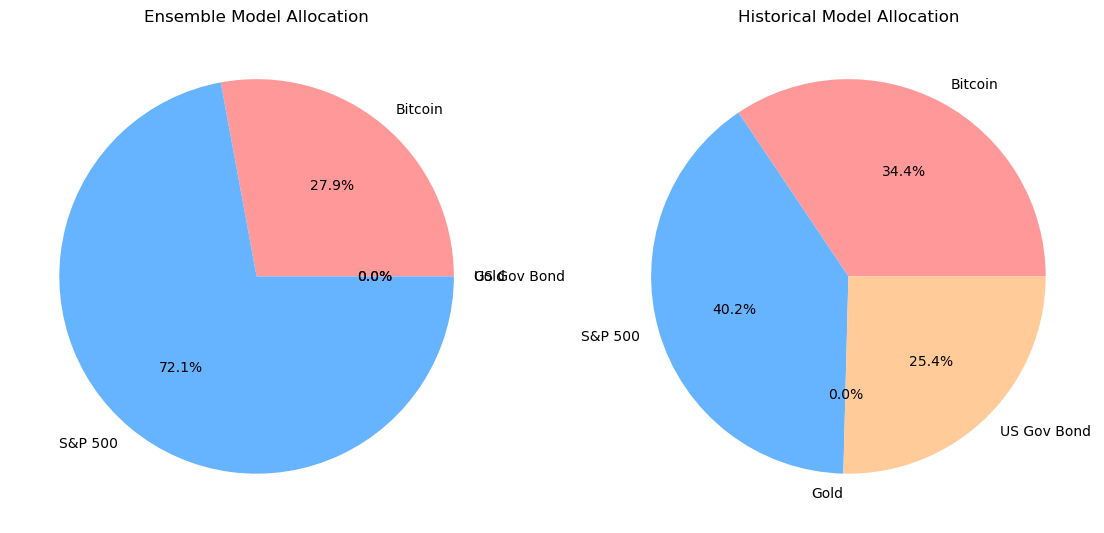

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the investment amount
investment_amount = 100000

# Define the optimal weights from both models
weights_ensemble_model = np.array([0.2791, 0.7209, 0.0, 0.0])
weights_historical_model = np.array([0.3441, 0.4018, 0.0, 0.2541])

# Define the assets
assets = ['Bitcoin', 'S&P 500', 'Gold', 'US Gov Bond']

# Calculate the dollar allocations for both models
allocation_ensemble = weights_ensemble_model * investment_amount
allocation_historical = weights_historical_model * investment_amount

# Create a DataFrame for easy display
allocation_df = pd.DataFrame({
    'Asset': assets,
    'Ensemble Model Allocation ($)': allocation_ensemble,
    'Historical Model Allocation ($)': allocation_historical
})

print("Dollar Allocations in a $100,000 Portfolio:")
print(allocation_df)

# Plotting the allocation as pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Ensemble Model
ax[0].pie(allocation_ensemble, labels=assets, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[0].set_title('Ensemble Model Allocation')

# Historical Model
ax[1].pie(allocation_historical, labels=assets, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[1].set_title('Historical Model Allocation')

# Show the plots
plt.show()


## ENSEMBLE MODEL MINIMUM ALLOCATION

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Function to calculate portfolio performance metrics
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to minimize the negative Sharpe ratio
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, returns, cov_matrix, risk_free_rate)[2]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: each weight is between 5% (0.05) and 100% (1)
bounds = tuple((0.05, 1) for _ in range(len(assets)))

# Initial guess: equal distribution
initial_weights = np.array([1/len(assets)] * len(assets))

# Optimize portfolio for maximum Sharpe ratio
optimal_result = minimize(negative_sharpe_ratio, initial_weights, args=(expected_annual_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = optimal_result.x

# Calculate the optimal portfolio performance
optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, expected_annual_returns, cov_matrix, risk_free_rate)

# Display the results
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(optimal_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(optimal_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(optimal_sharpe))


[*********************100%%**********************]  4 of 4 completed

Optimal Portfolio Weights:
               Asset    Weight
0            Bitcoin  0.297834
1            S&P 500  0.602166
2         Gold (GLD)  0.050000
3  US Gov Bond (TLT)  0.050000

Expected Annual Return: 29.36%
Portfolio Volatility (Annualized): 20.45%
Sharpe Ratio: 1.25



C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\2893336652.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()
C:\Users\Berke\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


### DATA STATISTICS

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Check what columns were actually downloaded
print("Columns in the DataFrame:")
print(data.columns)

# Calculate daily returns
daily_returns = data.pct_change(fill_method=None).dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Function to calculate portfolio performance metrics
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to minimize the negative Sharpe ratio
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, returns, cov_matrix, risk_free_rate)[2]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: each weight is between 5% (0.05) and 100% (1)
bounds = tuple((0.05, 1) for _ in range(len(assets)))

# Initial guess: equal distribution
initial_weights = np.array([1/len(assets)] * len(assets))

# Optimize portfolio for maximum Sharpe ratio
optimal_result = minimize(negative_sharpe_ratio, initial_weights, args=(expected_annual_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights
optimal_weights = optimal_result.x

# Calculate the optimal portfolio performance
optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, expected_annual_returns, cov_matrix, risk_free_rate)

# Display the results
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': optimal_weights
})

print("Optimal Portfolio Weights:")
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(optimal_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(optimal_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(optimal_sharpe))

# Data analysis
print("\n=== Data Analysis ===")

# Number of observations for each asset
print("\nNumber of Observations per Asset:")
print(data.count())

# Frequency of data points (ensuring daily data)
print("\nFrequency of Data Points:")
print(data.resample('D').ffill().count())

# Check for missing data
missing_data = data.isnull().sum()
print("\nMissing Data Points per Asset:")
print(missing_data)

# Check for any anomalies such as extreme values (e.g., values beyond a certain number of standard deviations from the mean)
z_scores = np.abs((data - data.mean()) / data.std())
anomalies = z_scores > 3  # Flag anomalies as points that are more than 3 standard deviations from the mean
print("\nAnomalies Detected (Data Points > 3 Standard Deviations from Mean):")
print(anomalies.sum())

# Summarize potential limitations or biases
print("\nData Summary:")
print(f"Total Number of Days of Data Used: {len(data)}")
print("Potential Limitations or Biases:")
if missing_data.any():
    print(" - Missing data detected. This may introduce biases in the analysis.")
if anomalies.any().any():
    print(" - Anomalies detected. These extreme values may affect the results.")
if data.index[0] > pd.to_datetime(start_date):
    print(f" - Data for some assets does not start from {start_date}. This may lead to unequal comparisons across assets.")
if data.index[-1] < pd.to_datetime(end_date):
    print(f" - Data for some assets does not extend to {end_date}. This may lead to incomplete analysis.")

# Ensure the asset names align with the columns
print("\nFirst and Last Date in the Dataset for Each Asset:")
for asset, ticker in assets.items():
    if ticker in data.columns:
        print(f"{asset}: From {data[ticker].first_valid_index()} to {data[ticker].last_valid_index()}")
    else:
        print(f"{asset}: Data for {ticker} not found.")


[*********************100%%**********************]  4 of 4 completed

Columns in the DataFrame:
Index(['BTC-USD', 'GLD', 'TLT', '^GSPC'], dtype='object', name='Ticker')
Optimal Portfolio Weights:
               Asset    Weight
0            Bitcoin  0.357494
1            S&P 500  0.542506
2         Gold (GLD)  0.050000
3  US Gov Bond (TLT)  0.050000

Expected Annual Return: 33.27%
Portfolio Volatility (Annualized): 25.68%
Sharpe Ratio: 1.15

=== Data Analysis ===

Number of Observations per Asset:
Ticker
BTC-USD    2555
GLD        1760
TLT        1760
^GSPC      1760
dtype: int64

Frequency of Data Points:
Ticker
BTC-USD    2555
GLD        1760
TLT        1760
^GSPC      1760
dtype: int64

Missing Data Points per Asset:
Ticker
BTC-USD      0
GLD        795
TLT        795
^GSPC      795
dtype: int64

Anomalies Detected (Data Points > 3 Standard Deviations from Mean):
Ticker
BTC-USD    0
GLD        0
TLT        0
^GSPC      0
dtype: int64

Data Summary:
Total Number of Days of Data Used: 2555
Potential Limitations or Biases:
 - Missing data detected. This m

## MONTE CARLO SIMULATION
NO CONSTRAINTS

[*********************100%%**********************]  4 of 4 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\1093272602.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Portfolio with Maximum Sharpe Ratio:
               Asset    Weight
0            Bitcoin  0.280959
1            S&P 500  0.701165
2         Gold (GLD)  0.007473
3  US Gov Bond (TLT)  0.010403

Expected Annual Return: 28.81%
Portfolio Volatility (Annualized): 19.78%
Sharpe Ratio: 1.26

Portfolio with Minimum Volatility:
               Asset    Weight
0            Bitcoin  0.003194
1            S&P 500  0.334141
2         Gold (GLD)  0.378650
3  US Gov Bond (TLT)  0.284015

Expected Annual Return: 6.24%
Portfolio Volatility (Annualized): 8.10%


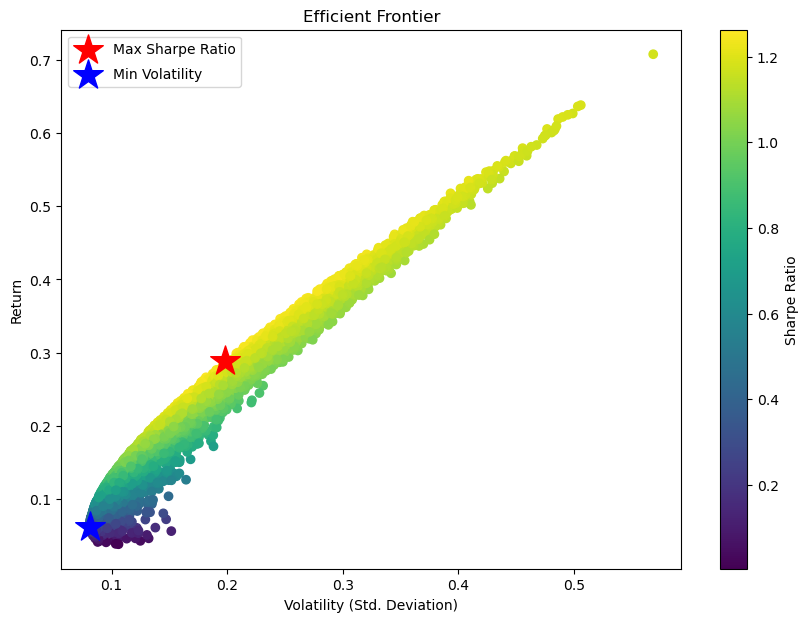

In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Number of portfolios to simulate
num_portfolios = 10000

# Array to store simulation results
results = np.zeros((3, num_portfolios))

# Array to store allocation results
weight_array = np.zeros((len(assets), num_portfolios))

# Perform Monte Carlo simulation
np.random.seed(42)  # For reproducibility
for i in range(num_portfolios):
    # Randomly assign weights to each asset
    weights = np.random.random(len(assets))
    # Normalize the weights so that they sum to 1
    weights /= np.sum(weights)
    
    # Store the weights
    weight_array[:, i] = weights
    
    # Calculate the portfolio return
    portfolio_return = np.sum(weights * expected_annual_returns)
    
    # Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Locate the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = weight_array[:, max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Locate the portfolio with the minimum volatility
min_volatility_idx = np.argmin(results[1])
min_volatility_allocation = weight_array[:, min_volatility_idx]
min_volatility_return = results[0, min_volatility_idx]
min_volatility_volatility = results[1, min_volatility_idx]

# Display the results
print("Portfolio with Maximum Sharpe Ratio:")
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': max_sharpe_allocation
})
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(max_sharpe_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(max_sharpe_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(results[2, max_sharpe_idx]))

print("\nPortfolio with Minimum Volatility:")
min_volatility_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': min_volatility_allocation
})
print(min_volatility_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(min_volatility_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(min_volatility_volatility * 100))

# Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(min_volatility_volatility, min_volatility_return, marker='*', color='b', s=500, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Return')
plt.legend(labelspacing=0.8)
plt.show()


[*********************100%%**********************]  4 of 4 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_24400\388728646.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Portfolio with Maximum Sharpe Ratio:
               Asset    Weight
0            Bitcoin  0.280959
1            S&P 500  0.701165
2         Gold (GLD)  0.007473
3  US Gov Bond (TLT)  0.010403

Expected Annual Return: 28.81%
Portfolio Volatility (Annualized): 19.78%
Sharpe Ratio: 1.26

Portfolio with Minimum Volatility:
               Asset    Weight
0            Bitcoin  0.003194
1            S&P 500  0.334141
2         Gold (GLD)  0.378650
3  US Gov Bond (TLT)  0.284015

Expected Annual Return: 6.24%
Portfolio Volatility (Annualized): 8.10%


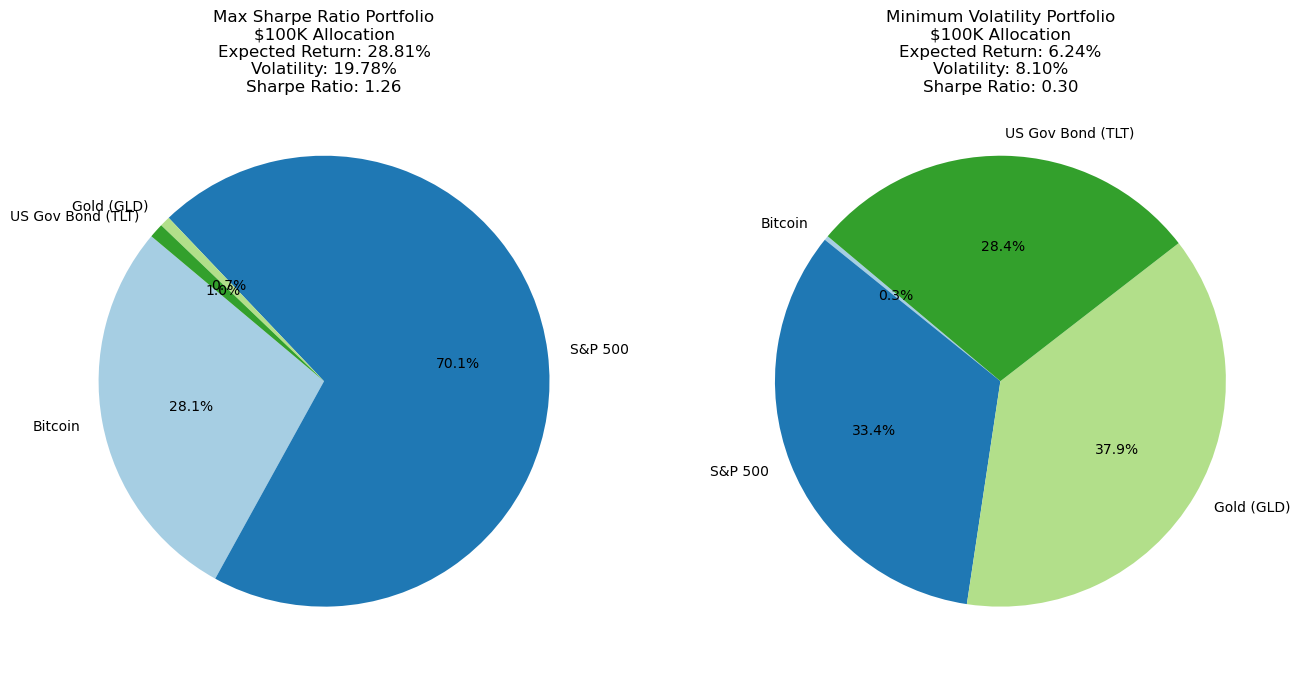

In [49]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Number of portfolios to simulate
num_portfolios = 10000

# Array to store simulation results
results = np.zeros((3, num_portfolios))

# Array to store allocation results
weight_array = np.zeros((len(assets), num_portfolios))

# Perform Monte Carlo simulation
np.random.seed(42)  # For reproducibility
for i in range(num_portfolios):
    # Randomly assign weights to each asset
    weights = np.random.random(len(assets))
    # Normalize the weights so that they sum to 1
    weights /= np.sum(weights)
    
    # Store the weights
    weight_array[:, i] = weights
    
    # Calculate the portfolio return
    portfolio_return = np.sum(weights * expected_annual_returns)
    
    # Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Locate the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = weight_array[:, max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Locate the portfolio with the minimum volatility
min_volatility_idx = np.argmin(results[1])
min_volatility_allocation = weight_array[:, min_volatility_idx]
min_volatility_return = results[0, min_volatility_idx]
min_volatility_volatility = results[1, min_volatility_idx]

# Display the results
print("Portfolio with Maximum Sharpe Ratio:")
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': max_sharpe_allocation
})
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(max_sharpe_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(max_sharpe_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(results[2, max_sharpe_idx]))

print("\nPortfolio with Minimum Volatility:")
min_volatility_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': min_volatility_allocation
})
print(min_volatility_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(min_volatility_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(min_volatility_volatility * 100))

# Total investment
total_investment = 100000  # $100,000 investment

# Calculate the dollar amount allocated to each asset for both portfolios
max_sharpe_investment = {asset: weight * total_investment for asset, weight in zip(assets.keys(), max_sharpe_allocation)}
min_volatility_investment = {asset: weight * total_investment for asset, weight in zip(assets.keys(), min_volatility_allocation)}

# Plot pie charts for both portfolios
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot for the Max Sharpe Ratio Portfolio
axs[0].pie(max_sharpe_investment.values(), labels=max_sharpe_investment.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title(f'Max Sharpe Ratio Portfolio\n$100K Allocation\nExpected Return: {max_sharpe_return*100:.2f}%\nVolatility: {max_sharpe_volatility*100:.2f}%\nSharpe Ratio: {results[2, max_sharpe_idx]:.2f}')

# Plot for the Minimum Volatility Portfolio
axs[1].pie(min_volatility_investment.values(), labels=min_volatility_investment.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title(f'Minimum Volatility Portfolio\n$100K Allocation\nExpected Return: {min_volatility_return*100:.2f}%\nVolatility: {min_volatility_volatility*100:.2f}%\nSharpe Ratio: {results[2, min_volatility_idx]:.2f}')

# Show the plots
plt.show()


### BACKTESTING

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_19452\3604658174.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()
[*********************100%%**********************]  1 of 1 completed


                Cumulative Return  Annualized Return  Volatility  Sharpe Ratio
Max Sharpe               3.585686           0.356066    0.239006      1.469056
Min Volatility           0.356538           0.062885    0.072225      0.802101
Benchmark                0.299664           0.053819    0.118174      0.413508


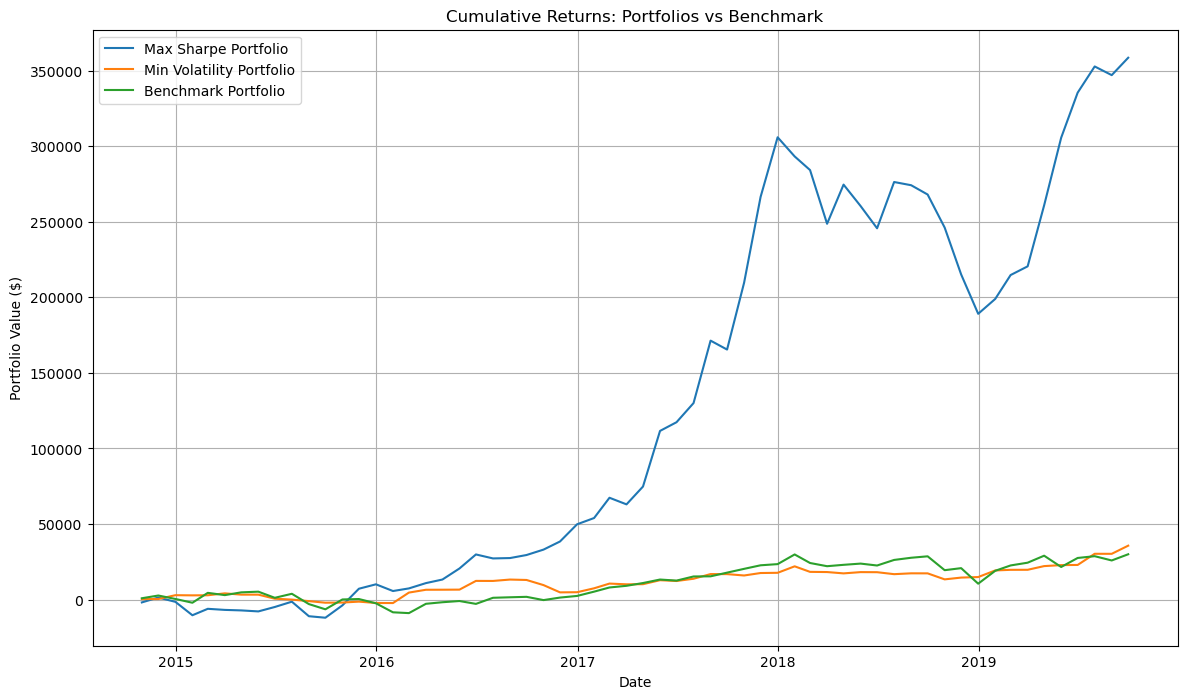

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.280959,
        'S&P 500': 0.701165,
        'Gold (GLD)': 0.007473,
        'US Gov Bond (TLT)': 0.010403
    },
    'Min Volatility': {
        'Bitcoin': 0.003194,
        'S&P 500': 0.334141,
        'Gold (GLD)': 0.378650,
        'US Gov Bond (TLT)': 0.284015
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Check if monthly_returns is empty
    if monthly_returns.empty:
        print("Error: monthly_returns is empty. Please check the data resampling process.")
    
    # Benchmark (MSCI World Index)
    benchmark = yf.download('URTH', start=start_date, end=end_date, interval='1d')['Close'].resample('M').ffill().pct_change().dropna()

    # Initialize portfolio metrics storage
    portfolio_metrics = {}

    # Backtest each portfolio
    initial_investment = 100000

    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Check if portfolio_monthly_returns is empty
        if portfolio_monthly_returns.empty:
            print(f"Error: portfolio_monthly_returns for {name} is empty.")
            continue
        
        # Compound the returns
        portfolio_cumulative_returns = (1 + portfolio_monthly_returns).cumprod() - 1
        portfolio_cumulative_returns *= initial_investment  # Scale by initial investment
        
        # Check if portfolio_cumulative_returns is empty
        if portfolio_cumulative_returns.empty:
            print(f"Error: portfolio_cumulative_returns for {name} is empty.")
            continue
        
        # Calculate key performance metrics
        cumulative_return = portfolio_cumulative_returns.iloc[-1] / initial_investment
        annualized_return = (1 + cumulative_return) ** (12 / len(portfolio_monthly_returns)) - 1
        volatility = portfolio_monthly_returns.std() * np.sqrt(12)  # Annualize volatility
        sharpe_ratio = (annualized_return - benchmark.mean()) / volatility
        
        # Store metrics
        portfolio_metrics[name] = {
            'Cumulative Return': cumulative_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Cumulative Returns': portfolio_cumulative_returns
        }

    # Benchmark metrics
    benchmark_cumulative_returns = (1 + benchmark).cumprod() - 1
    benchmark_cumulative_returns *= initial_investment
    benchmark_cumulative_return = benchmark_cumulative_returns.iloc[-1] / initial_investment
    benchmark_annualized_return = (1 + benchmark_cumulative_return) ** (12 / len(benchmark)) - 1
    benchmark_volatility = benchmark.std() * np.sqrt(12)  # Annualize volatility
    benchmark_sharpe_ratio = (benchmark_annualized_return - benchmark.mean()) / benchmark_volatility

    portfolio_metrics['Benchmark'] = {
        'Cumulative Return': benchmark_cumulative_return,
        'Annualized Return': benchmark_annualized_return,
        'Volatility': benchmark_volatility,
        'Sharpe Ratio': benchmark_sharpe_ratio,
        'Cumulative Returns': benchmark_cumulative_returns
    }

    # Display performance comparison
    metrics_df = pd.DataFrame({
        'Cumulative Return': {name: metrics['Cumulative Return'] for name, metrics in portfolio_metrics.items()},
        'Annualized Return': {name: metrics['Annualized Return'] for name, metrics in portfolio_metrics.items()},
        'Volatility': {name: metrics['Volatility'] for name, metrics in portfolio_metrics.items()},
        'Sharpe Ratio': {name: metrics['Sharpe Ratio'] for name, metrics in portfolio_metrics.items()}
    })

    print(metrics_df)

    # Plot the cumulative returns for each portfolio and the benchmark
    plt.figure(figsize=(14, 8))
    for name, metrics in portfolio_metrics.items():
        plt.plot(metrics['Cumulative Returns'], label=f'{name} Portfolio')
    plt.title('Cumulative Returns: Portfolios vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_19452\1217039124.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()


Portfolio Values Each Month:
               Max Sharpe  Min Volatility
Date                                     
2014-10-31   98100.137585   100306.347662
2014-11-30  101336.508126   100343.966814
2014-12-31   98482.851395   102877.939554
2015-01-31   89605.472602   102772.515828
2015-02-28   93865.634184   102828.062813
2015-03-31   93149.240350   104098.856451
2015-04-30   92803.703494   103246.032431
2015-05-31   92146.179821   103237.716490
2015-06-30   95079.145197   100558.887748
2015-07-31   98582.033702    99960.296571
2015-08-31   88962.126310    98954.809605
2015-09-30   87969.194557    97904.566156
2015-10-31   96146.975889    98008.032663
2015-11-30  107158.341335    98619.941905
2015-12-31  110078.187954    97717.538138
2016-01-31  105639.119088    97672.740503
2016-02-29  107367.154995   104602.328716
2016-03-31  110880.087091   106475.071055
2016-04-30  113241.535756   106500.849983
2016-05-31  120555.688223   106560.924896
2016-06-30  129845.841452   112335.639621
2016-

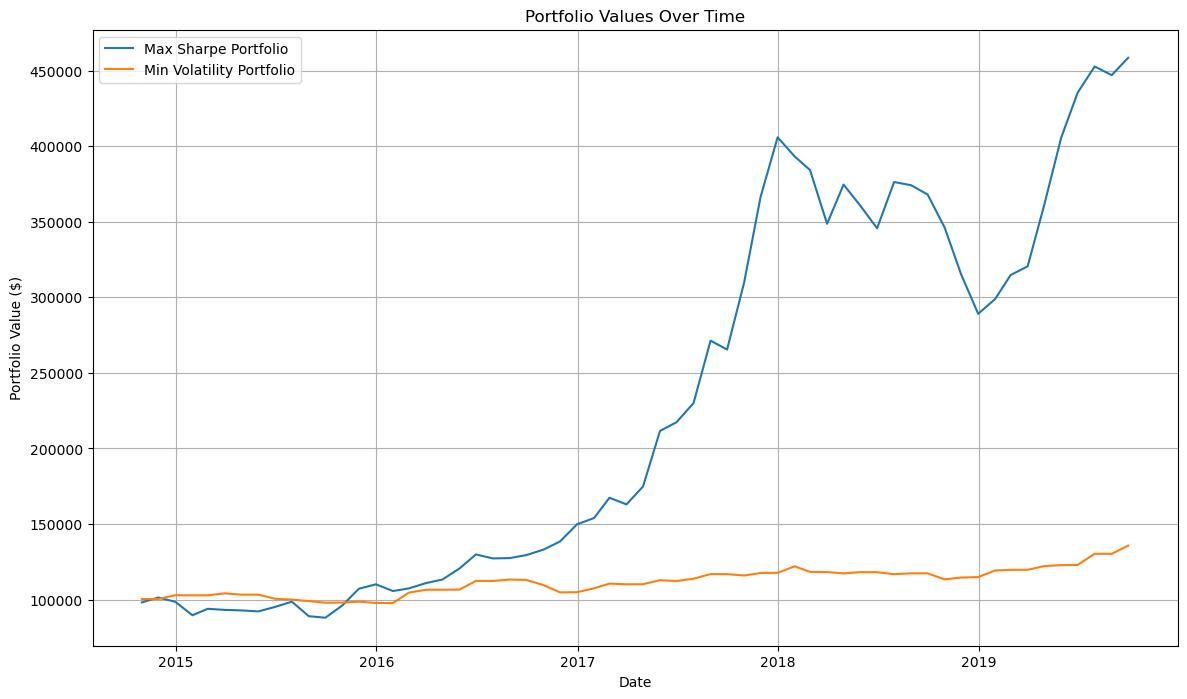

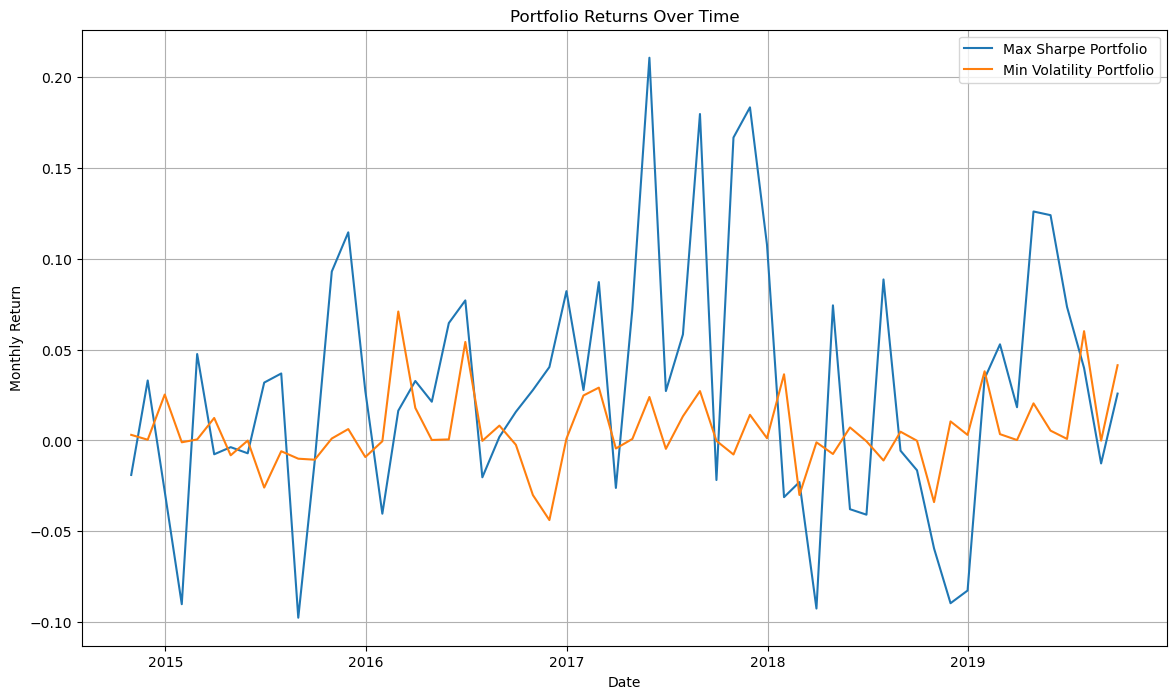

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.280959,
        'S&P 500': 0.701165,
        'Gold (GLD)': 0.007473,
        'US Gov Bond (TLT)': 0.010403
    },
    'Min Volatility': {
        'Bitcoin': 0.003194,
        'S&P 500': 0.334141,
        'Gold (GLD)': 0.378650,
        'US Gov Bond (TLT)': 0.284015
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Check if monthly_returns is empty
    if monthly_returns.empty:
        print("Error: monthly_returns is empty. Please check the data resampling process.")
    
    # Initialize portfolio metrics storage
    portfolio_values = {}
    portfolio_returns = {}

    # Initial investment amount
    initial_investment = 100000

    # Backtest each portfolio
    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Check if portfolio_monthly_returns is empty
        if portfolio_monthly_returns.empty:
            print(f"Error: portfolio_monthly_returns for {name} is empty.")
            continue
        
        # Calculate the portfolio value over time
        portfolio_value = initial_investment * (1 + portfolio_monthly_returns).cumprod()
        
        # Store portfolio value and returns
        portfolio_values[name] = portfolio_value
        portfolio_returns[name] = portfolio_monthly_returns

    # Create a DataFrame to display the results
    portfolio_values_df = pd.DataFrame(portfolio_values)
    portfolio_returns_df = pd.DataFrame(portfolio_returns)

    # Display the portfolio values and returns
    print("Portfolio Values Each Month:")
    print(portfolio_values_df)
    print("\nPortfolio Returns Each Month:")
    print(portfolio_returns_df)

    # Plot portfolio values
    plt.figure(figsize=(14, 8))
    for name in portfolios.keys():
        plt.plot(portfolio_values_df[name], label=f'{name} Portfolio')
    plt.title('Portfolio Values Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot portfolio returns
    plt.figure(figsize=(14, 8))
    for name in portfolios.keys():
        plt.plot(portfolio_returns_df[name], label=f'{name} Portfolio')
    plt.title('Portfolio Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Monthly Return')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\2499095576.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()


                Cumulative Return  Annualized Return  Volatility  \
Max Sharpe               3.585686           0.356066    0.239006   
Min Volatility           0.356538           0.062885    0.072225   

                Sharpe Ratio  Maximum Drawdown  
Max Sharpe          1.329953         -0.287793  
Min Volatility      0.341783         -0.074848  


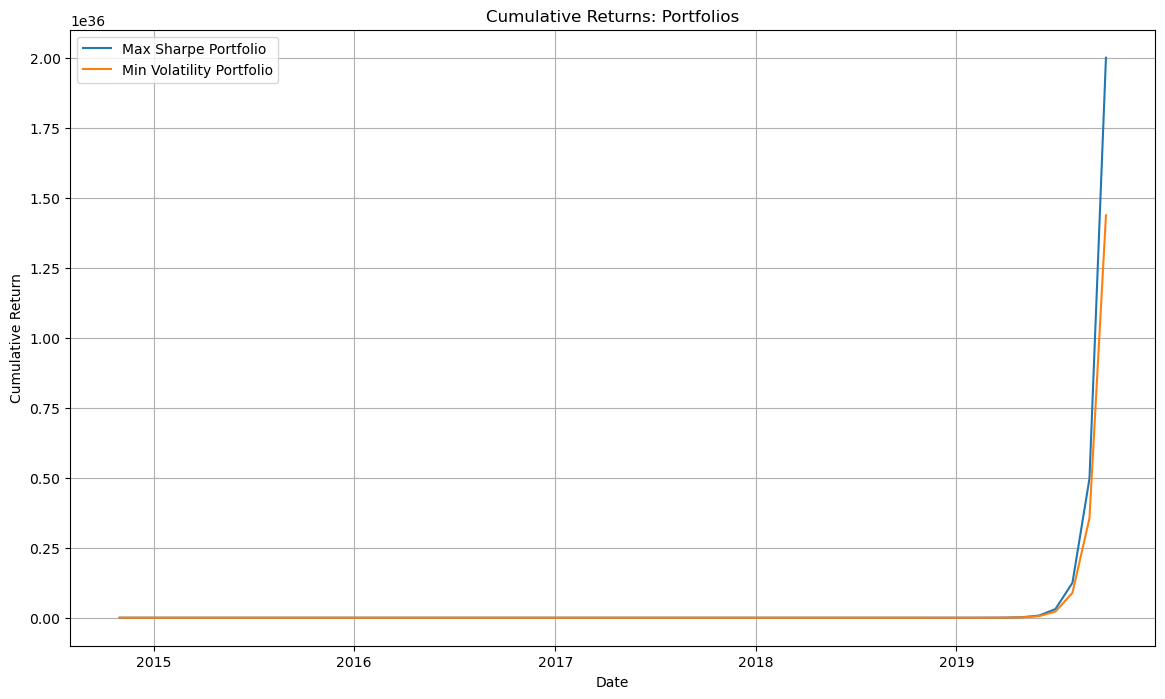

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.280959,
        'S&P 500': 0.701165,
        'Gold (GLD)': 0.007473,
        'US Gov Bond (TLT)': 0.010403
    },
    'Min Volatility': {
        'Bitcoin': 0.003194,
        'S&P 500': 0.334141,
        'Gold (GLD)': 0.378650,
        'US Gov Bond (TLT)': 0.284015
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Initialize portfolio metrics storage
    portfolio_metrics = {}

    # Risk-free rate for Sharpe Ratio calculation
    risk_free_rate = 0.0382 / 12  # Assuming 1% annual risk-free rate, convert to monthly

    # Backtest each portfolio
    initial_investment = 100000

    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Calculate portfolio cumulative returns
        portfolio_cumulative_returns = (1 + portfolio_monthly_returns).cumprod() - 1
        
        # Calculate key performance metrics
        cumulative_return = portfolio_cumulative_returns.iloc[-1]
        annualized_return = (1 + cumulative_return) ** (12 / len(portfolio_monthly_returns)) - 1
        volatility = portfolio_monthly_returns.std() * np.sqrt(12)  # Annualize volatility
        sharpe_ratio = (annualized_return - risk_free_rate * 12) / volatility
        
        # Calculate Maximum Drawdown
        cumulative_returns_with_initial = (1 + portfolio_cumulative_returns)
        rolling_max = cumulative_returns_with_initial.cummax()
        drawdown = cumulative_returns_with_initial / rolling_max - 1
        max_drawdown = drawdown.min()
        
        # Store metrics
        portfolio_metrics[name] = {
            'Cumulative Return': cumulative_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Maximum Drawdown': max_drawdown
        }

    # Display performance metrics
    metrics_df = pd.DataFrame(portfolio_metrics).T

    print(metrics_df)

    # Plot the cumulative returns for each portfolio
    plt.figure(figsize=(14, 8))
    for name, metrics in portfolio_metrics.items():
        plt.plot((1 + monthly_returns * list(portfolios[name].values())).sum(axis=1).cumprod(), label=f'{name} Portfolio')
    plt.title('Cumulative Returns: Portfolios')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()


# MONTE CARLO SIM
5%-40% MIN-MAX PER ASSET CONSTRAINT

[*********************100%%**********************]  4 of 4 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\4226631555.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Portfolio with Maximum Sharpe Ratio:
               Asset    Weight
0            Bitcoin  0.383237
1            S&P 500  0.392424
2         Gold (GLD)  0.156799
3  US Gov Bond (TLT)  0.067541

Expected Annual Return: 34.15%
Portfolio Volatility (Annualized): 24.85%
Sharpe Ratio: 1.22

Portfolio with Minimum Volatility:
               Asset    Weight
0            Bitcoin  0.051469
1            S&P 500  0.311998
2         Gold (GLD)  0.319113
3  US Gov Bond (TLT)  0.317421

Expected Annual Return: 9.55%
Portfolio Volatility (Annualized): 8.89%


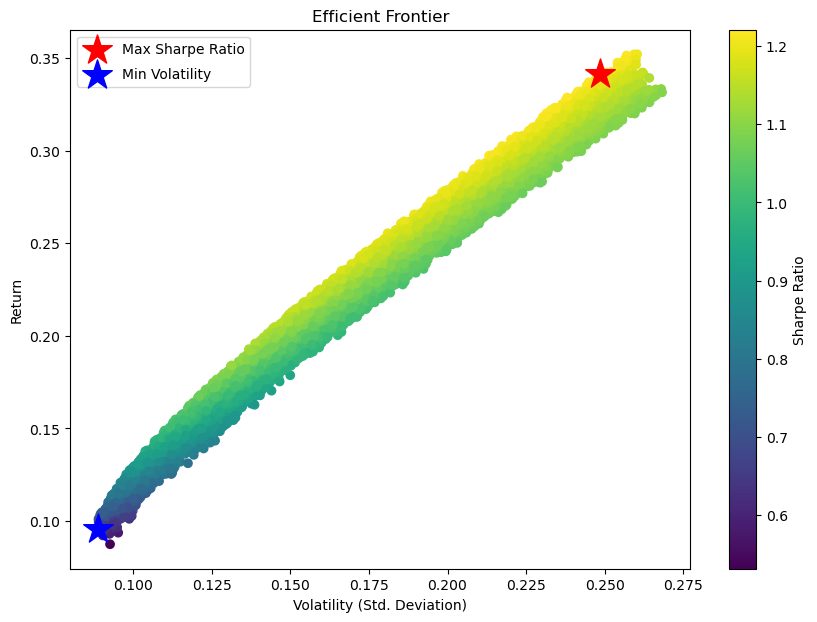

In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the expected returns for each asset (using provided figures)
expected_annual_returns = np.array([
    0.7611509621877798,  # Bitcoin
    0.10493734407301046, # S&P 500
    0.04076087015620875, # Gold
    0.033223592359817374 # US Gov Bond
])

# Define the time period for historical data (for covariance matrix calculation)
start_date = '2017-01-01'
end_date = '2023-12-31'

# Download historical data for all assets
data = yf.download(list(assets.values()), start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the covariance matrix of annualized returns
cov_matrix = daily_returns.cov() * 252

# Define risk-free rate (using a placeholder value, typically the yield on Treasury bonds)
risk_free_rate = 0.0382

# Number of portfolios to simulate
num_portfolios = 10000

# Array to store simulation results
results = np.zeros((3, num_portfolios))

# Array to store allocation results
weight_array = np.zeros((len(assets), num_portfolios))

# Perform Monte Carlo simulation
np.random.seed(42)  # For reproducibility
for i in range(num_portfolios):
    # Initialize weights
    weights = np.zeros(len(assets))
    
    # Generate weights that meet the constraints
    while True:
        weights = np.random.uniform(0.05, 0.40, len(assets))
        weights /= np.sum(weights)  # Normalize the weights
        
        if all(weights >= 0.05) and all(weights <= 0.40):
            break
    
    # Store the weights
    weight_array[:, i] = weights
    
    # Calculate the portfolio return
    portfolio_return = np.sum(weights * expected_annual_returns)
    
    # Calculate the portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Locate the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = weight_array[:, max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Locate the portfolio with the minimum volatility
min_volatility_idx = np.argmin(results[1])
min_volatility_allocation = weight_array[:, min_volatility_idx]
min_volatility_return = results[0, min_volatility_idx]
min_volatility_volatility = results[1, min_volatility_idx]

# Display the results
print("Portfolio with Maximum Sharpe Ratio:")
optimal_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': max_sharpe_allocation
})
print(optimal_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(max_sharpe_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(max_sharpe_volatility * 100))
print("Sharpe Ratio: {:.2f}".format(results[2, max_sharpe_idx]))

print("\nPortfolio with Minimum Volatility:")
min_volatility_portfolio = pd.DataFrame({
    'Asset': list(assets.keys()),
    'Weight': min_volatility_allocation
})
print(min_volatility_portfolio)
print("\nExpected Annual Return: {:.2f}%".format(min_volatility_return * 100))
print("Portfolio Volatility (Annualized): {:.2f}%".format(min_volatility_volatility * 100))

# Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(min_volatility_volatility, min_volatility_return, marker='*', color='b', s=500, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Return')
plt.legend(labelspacing=0.8)
plt.show()


Investment Allocation for Portfolio with Maximum Sharpe Ratio:
               Asset   Amount  Percentage
0            Bitcoin  38323.7     38.3237
1            S&P 500  39242.4     39.2424
2         Gold (GLD)  15679.9     15.6799
3  US Gov Bond (TLT)   6754.1      6.7541

Investment Allocation for Portfolio with Minimum Volatility:
               Asset   Amount  Percentage
0            Bitcoin   5146.9      5.1469
1            S&P 500  31199.8     31.1998
2         Gold (GLD)  31911.3     31.9113
3  US Gov Bond (TLT)  31742.1     31.7421


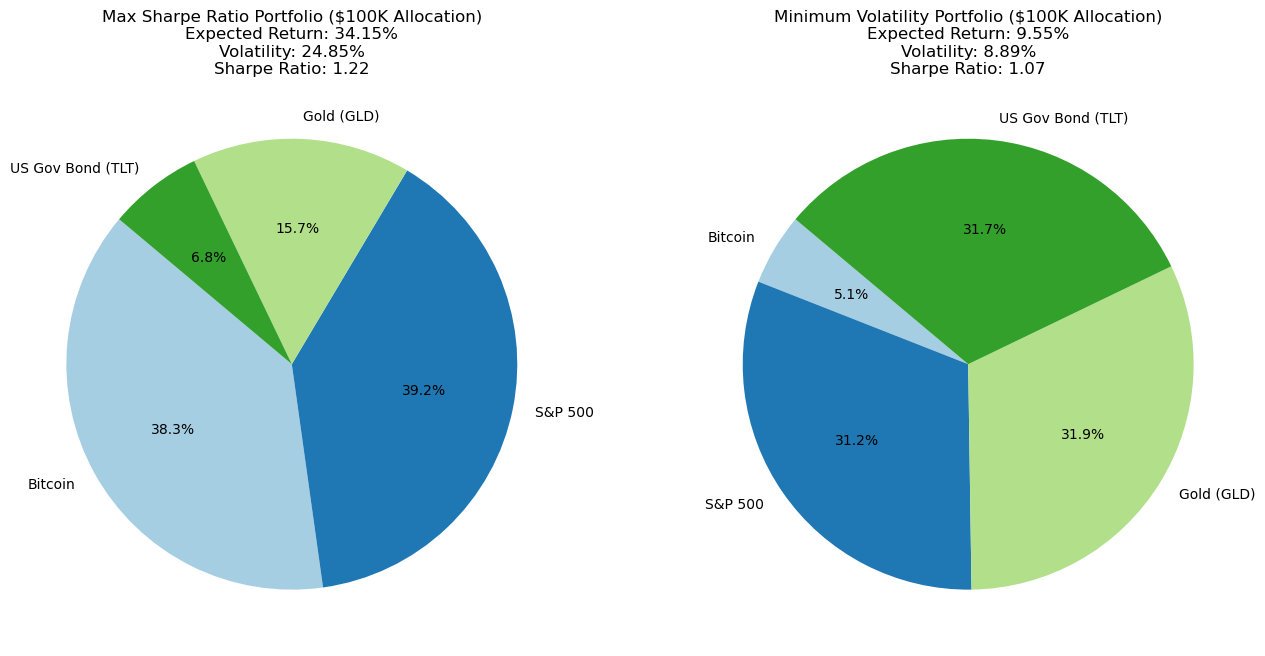

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the portfolios
max_sharpe_portfolio = {
    'Bitcoin': 0.383237,
    'S&P 500': 0.392424,
    'Gold (GLD)': 0.156799,
    'US Gov Bond (TLT)': 0.067541
}

min_volatility_portfolio = {
    'Bitcoin': 0.051469,
    'S&P 500': 0.311998,
    'Gold (GLD)': 0.319113,
    'US Gov Bond (TLT)': 0.317421
}

# Define the corresponding metrics for each portfolio
max_sharpe_metrics = {
    'Expected Return': 34.15,
    'Volatility': 24.85,
    'Sharpe Ratio': 1.22
}

min_volatility_metrics = {
    'Expected Return': 9.55,
    'Volatility': 8.89,
    'Sharpe Ratio': 1.07
}

# Define the total investment
total_investment = 100000  # $100,000 investment

# Calculate the dollar amount allocated to each asset for both portfolios
max_sharpe_allocation = {asset: weight * total_investment for asset, weight in max_sharpe_portfolio.items()}
min_volatility_allocation = {asset: weight * total_investment for asset, weight in min_volatility_portfolio.items()}

# Create DataFrames for better visualization and calculations
max_sharpe_df = pd.DataFrame(list(max_sharpe_allocation.items()), columns=['Asset', 'Amount'])
max_sharpe_df['Percentage'] = max_sharpe_df['Amount'] / total_investment * 100

min_volatility_df = pd.DataFrame(list(min_volatility_allocation.items()), columns=['Asset', 'Amount'])
min_volatility_df['Percentage'] = min_volatility_df['Amount'] / total_investment * 100

# Print the investment allocations
print("Investment Allocation for Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_df)
print("\nInvestment Allocation for Portfolio with Minimum Volatility:")
print(min_volatility_df)

# Plot pie charts for both portfolios
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot for the Max Sharpe Ratio Portfolio
axs[0].pie(max_sharpe_allocation.values(), labels=max_sharpe_allocation.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title(f'Max Sharpe Ratio Portfolio ($100K Allocation)\nExpected Return: {max_sharpe_metrics["Expected Return"]}%\nVolatility: {max_sharpe_metrics["Volatility"]}%\nSharpe Ratio: {max_sharpe_metrics["Sharpe Ratio"]}')

# Plot for the Minimum Volatility Portfolio
axs[1].pie(min_volatility_allocation.values(), labels=min_volatility_allocation.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title(f'Minimum Volatility Portfolio ($100K Allocation)\nExpected Return: {min_volatility_metrics["Expected Return"]}%\nVolatility: {min_volatility_metrics["Volatility"]}%\nSharpe Ratio: {min_volatility_metrics["Sharpe Ratio"]}')

# Show the plots
plt.show()


## BACKTESTING

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\3353140267.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()
[*********************100%%**********************]  1 of 1 completed


                Cumulative Return  Annualized Return  Volatility  Sharpe Ratio
Max Sharpe               5.175570           0.439247    0.312705      1.388827
Min Volatility           0.674154           0.108560    0.081404      1.272733
Benchmark                0.299664           0.053819    0.118174      0.413508


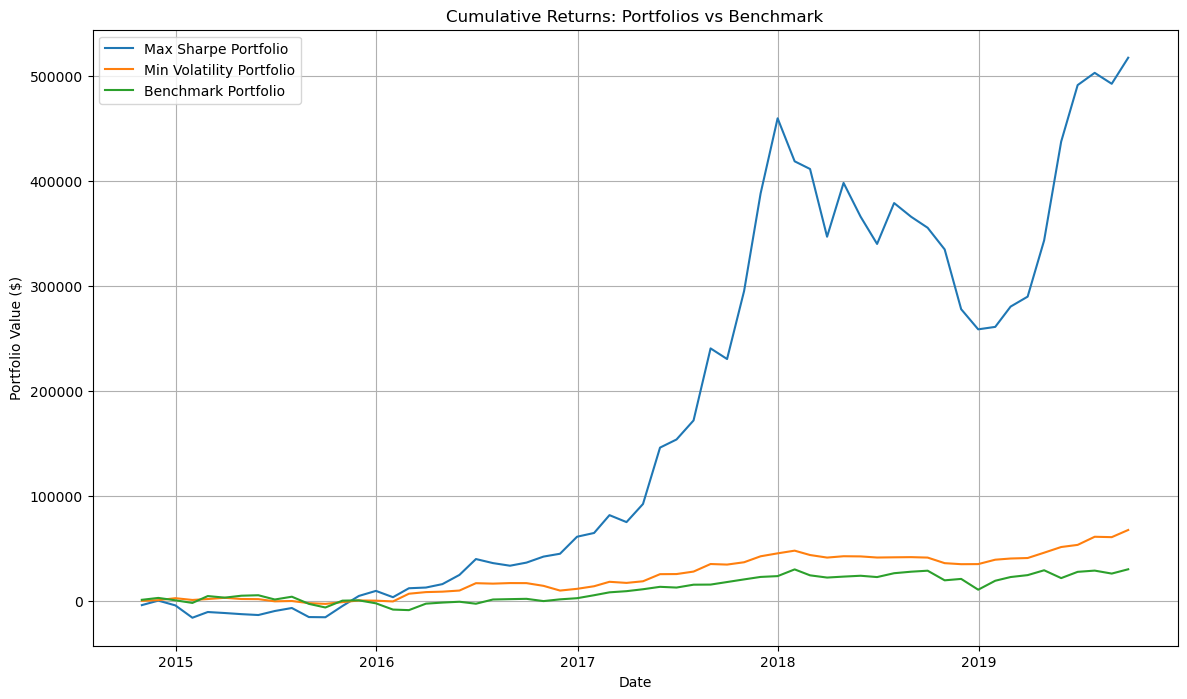

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.383237,
        'S&P 500': 0.392424,
        'Gold (GLD)': 0.156799,
        'US Gov Bond (TLT)': 0.067541
    },
    'Min Volatility': {
        'Bitcoin': 0.051469,
        'S&P 500': 0.311998,
        'Gold (GLD)': 0.319113,
        'US Gov Bond (TLT)': 0.317421
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Check if monthly_returns is empty
    if monthly_returns.empty:
        print("Error: monthly_returns is empty. Please check the data resampling process.")
    
    # Benchmark (MSCI World Index)
    benchmark = yf.download('URTH', start=start_date, end=end_date, interval='1d')['Close'].resample('M').ffill().pct_change().dropna()

    # Initialize portfolio metrics storage
    portfolio_metrics = {}

    # Backtest each portfolio
    initial_investment = 100000

    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Check if portfolio_monthly_returns is empty
        if portfolio_monthly_returns.empty:
            print(f"Error: portfolio_monthly_returns for {name} is empty.")
            continue
        
        # Compound the returns
        portfolio_cumulative_returns = (1 + portfolio_monthly_returns).cumprod() - 1
        portfolio_cumulative_returns *= initial_investment  # Scale by initial investment
        
        # Check if portfolio_cumulative_returns is empty
        if portfolio_cumulative_returns.empty:
            print(f"Error: portfolio_cumulative_returns for {name} is empty.")
            continue
        
        # Calculate key performance metrics
        cumulative_return = portfolio_cumulative_returns.iloc[-1] / initial_investment
        annualized_return = (1 + cumulative_return) ** (12 / len(portfolio_monthly_returns)) - 1
        volatility = portfolio_monthly_returns.std() * np.sqrt(12)  # Annualize volatility
        sharpe_ratio = (annualized_return - benchmark.mean()) / volatility
        
        # Store metrics
        portfolio_metrics[name] = {
            'Cumulative Return': cumulative_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Cumulative Returns': portfolio_cumulative_returns
        }

    # Benchmark metrics
    benchmark_cumulative_returns = (1 + benchmark).cumprod() - 1
    benchmark_cumulative_returns *= initial_investment
    benchmark_cumulative_return = benchmark_cumulative_returns.iloc[-1] / initial_investment
    benchmark_annualized_return = (1 + benchmark_cumulative_return) ** (12 / len(benchmark)) - 1
    benchmark_volatility = benchmark.std() * np.sqrt(12)  # Annualize volatility
    benchmark_sharpe_ratio = (benchmark_annualized_return - benchmark.mean()) / benchmark_volatility

    portfolio_metrics['Benchmark'] = {
        'Cumulative Return': benchmark_cumulative_return,
        'Annualized Return': benchmark_annualized_return,
        'Volatility': benchmark_volatility,
        'Sharpe Ratio': benchmark_sharpe_ratio,
        'Cumulative Returns': benchmark_cumulative_returns
    }

    # Display performance comparison
    metrics_df = pd.DataFrame({
        'Cumulative Return': {name: metrics['Cumulative Return'] for name, metrics in portfolio_metrics.items()},
        'Annualized Return': {name: metrics['Annualized Return'] for name, metrics in portfolio_metrics.items()},
        'Volatility': {name: metrics['Volatility'] for name, metrics in portfolio_metrics.items()},
        'Sharpe Ratio': {name: metrics['Sharpe Ratio'] for name, metrics in portfolio_metrics.items()}
    })

    print(metrics_df)

    # Plot the cumulative returns for each portfolio and the benchmark
    plt.figure(figsize=(14, 8))
    for name, metrics in portfolio_metrics.items():
        plt.plot(metrics['Cumulative Returns'], label=f'{name} Portfolio')
    plt.title('Cumulative Returns: Portfolios vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\3612422265.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()


Portfolio Values Each Month:
               Max Sharpe  Min Volatility
Date                                     
2014-10-31   95788.880724    99915.847909
2014-11-30  100099.386237   100519.693338
2014-12-31   95530.199419   102409.386906
2015-01-31   83784.218128   100718.297047
2015-02-28   89217.700237   101595.505267
2015-03-31   88258.718159   102771.904190
2015-04-30   87195.591246   101632.148531
2015-05-31   86352.906572   101500.237847
2015-06-30   90191.861212    99420.595447
2015-07-31   93052.317769    99714.257950
2015-08-31   84411.526221    97675.922632
2015-09-30   84241.016226    96981.217748
2015-10-31   94923.025695    98632.781311
2015-11-30  104550.865688   100239.063565
2015-12-31  109361.254773   100046.567524
2016-01-31  103345.659926    99307.480486
2016-02-29  111878.179717   106654.324523
2016-03-31  112552.245947   108204.763066
2016-04-30  115821.913516   108626.920179
2016-05-31  124596.570256   109690.744530
2016-06-30  139714.150868   116707.699412
2016-

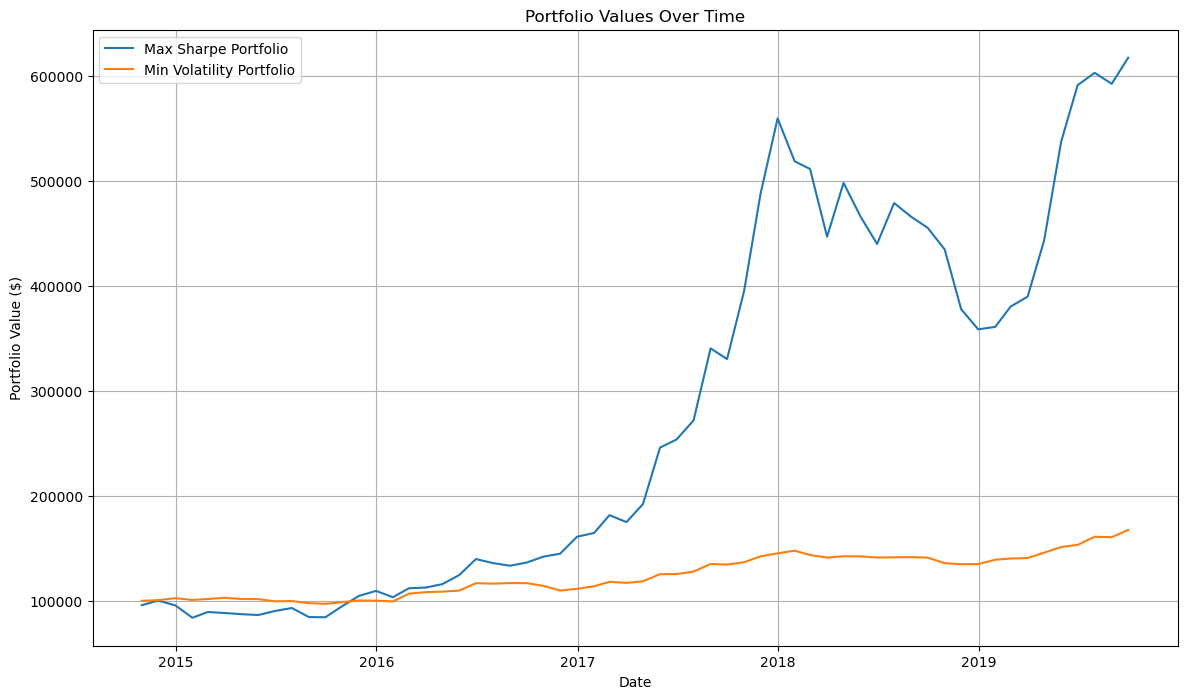

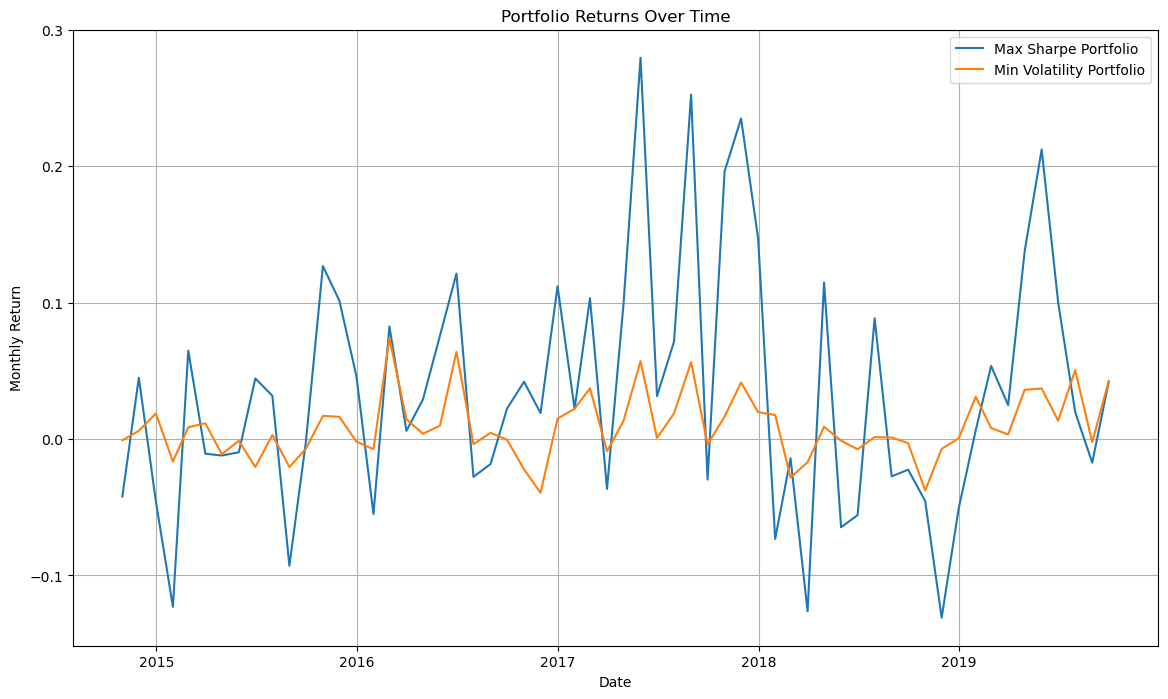

In [26]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.383237,
        'S&P 500': 0.392424,
        'Gold (GLD)': 0.156799,
        'US Gov Bond (TLT)': 0.067541
    },
    'Min Volatility': {
        'Bitcoin': 0.051469,
        'S&P 500': 0.311998,
        'Gold (GLD)': 0.319113,
        'US Gov Bond (TLT)': 0.317421
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Check if monthly_returns is empty
    if monthly_returns.empty:
        print("Error: monthly_returns is empty. Please check the data resampling process.")
    
    # Initialize portfolio metrics storage
    portfolio_values = {}
    portfolio_returns = {}

    # Initial investment amount
    initial_investment = 100000

    # Backtest each portfolio
    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Check if portfolio_monthly_returns is empty
        if portfolio_monthly_returns.empty:
            print(f"Error: portfolio_monthly_returns for {name} is empty.")
            continue
        
        # Calculate the portfolio value over time
        portfolio_value = initial_investment * (1 + portfolio_monthly_returns).cumprod()
        
        # Store portfolio value and returns
        portfolio_values[name] = portfolio_value
        portfolio_returns[name] = portfolio_monthly_returns

    # Create a DataFrame to display the results
    portfolio_values_df = pd.DataFrame(portfolio_values)
    portfolio_returns_df = pd.DataFrame(portfolio_returns)

    # Display the portfolio values and returns
    print("Portfolio Values Each Month:")
    print(portfolio_values_df)
    print("\nPortfolio Returns Each Month:")
    print(portfolio_returns_df)

    # Plot portfolio values
    plt.figure(figsize=(14, 8))
    for name in portfolios.keys():
        plt.plot(portfolio_values_df[name], label=f'{name} Portfolio')
    plt.title('Portfolio Values Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot portfolio returns
    plt.figure(figsize=(14, 8))
    for name in portfolios.keys():
        plt.plot(portfolio_returns_df[name], label=f'{name} Portfolio')
    plt.title('Portfolio Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Monthly Return')
    plt.legend()
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\2240922169.py:50: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()


                Cumulative Return  Annualized Return  Volatility  \
Max Sharpe               5.175570           0.439247    0.312705   
Min Volatility           0.674154           0.108560    0.081404   

                Sharpe Ratio  Maximum Drawdown  
Max Sharpe          1.282508         -0.359301  
Min Volatility      0.864323         -0.087298  


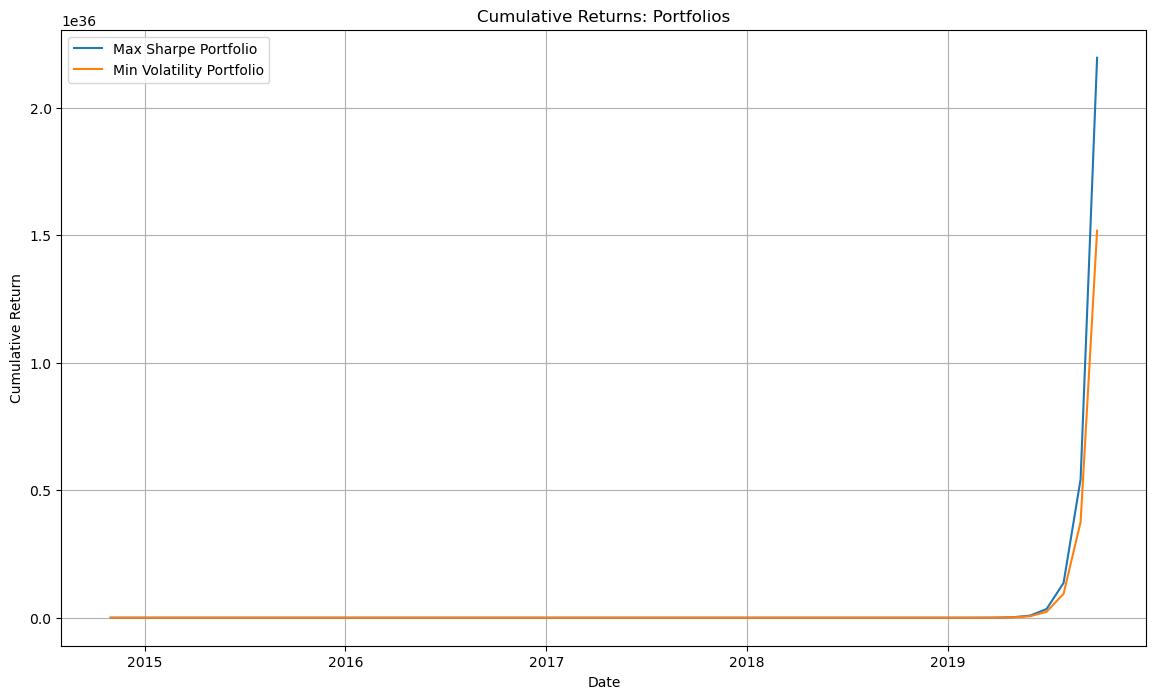

In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe': {
        'Bitcoin': 0.383237,
        'S&P 500': 0.392424,
        'Gold (GLD)': 0.156799,
        'US Gov Bond (TLT)': 0.067541
    },
    'Min Volatility': {
        'Bitcoin': 0.051469,
        'S&P 500': 0.311998,
        'Gold (GLD)': 0.319113,
        'US Gov Bond (TLT)': 0.317421
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Initialize portfolio metrics storage
    portfolio_metrics = {}

    # Risk-free rate for Sharpe Ratio calculation
    risk_free_rate = 0.0382 / 12  # Assuming 1% annual risk-free rate, convert to monthly

    # Backtest each portfolio
    initial_investment = 100000

    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Calculate portfolio cumulative returns
        portfolio_cumulative_returns = (1 + portfolio_monthly_returns).cumprod() - 1
        
        # Calculate key performance metrics
        cumulative_return = portfolio_cumulative_returns.iloc[-1]
        annualized_return = (1 + cumulative_return) ** (12 / len(portfolio_monthly_returns)) - 1
        volatility = portfolio_monthly_returns.std() * np.sqrt(12)  # Annualize volatility
        sharpe_ratio = (annualized_return - risk_free_rate * 12) / volatility
        
        # Calculate Maximum Drawdown
        cumulative_returns_with_initial = (1 + portfolio_cumulative_returns)
        rolling_max = cumulative_returns_with_initial.cummax()
        drawdown = cumulative_returns_with_initial / rolling_max - 1
        max_drawdown = drawdown.min()
        
        # Store metrics
        portfolio_metrics[name] = {
            'Cumulative Return': cumulative_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Maximum Drawdown': max_drawdown
        }

    # Display performance metrics
    metrics_df = pd.DataFrame(portfolio_metrics).T

    print(metrics_df)

    # Plot the cumulative returns for each portfolio
    plt.figure(figsize=(14, 8))
    for name, metrics in portfolio_metrics.items():
        plt.plot((1 + monthly_returns * list(portfolios[name].values())).sum(axis=1).cumprod(), label=f'{name} Portfolio')
    plt.title('Cumulative Returns: Portfolios')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()


# Risk/Return Profile Scatter Plot

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\3474649028.py:62: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()
C:\Users\Berke\AppData\Local\Temp\ipykernel_9656\3474649028.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (metrics_df['Volatility'][i], metrics_df

                                 Cumulative Return  Annualized Return  \
Max Sharpe with Constraints               5.175570           0.439247   
Min Volatility with Constraints           0.674154           0.108560   
Max Sharpe no Constraints                 3.585686           0.356066   
Min Volatility no Constraints             0.356538           0.062885   

                                 Volatility  Sharpe Ratio  
Max Sharpe with Constraints        0.312705      1.282508  
Min Volatility with Constraints    0.081404      0.864323  
Max Sharpe no Constraints          0.239006      1.329953  
Min Volatility no Constraints      0.072225      0.341783  


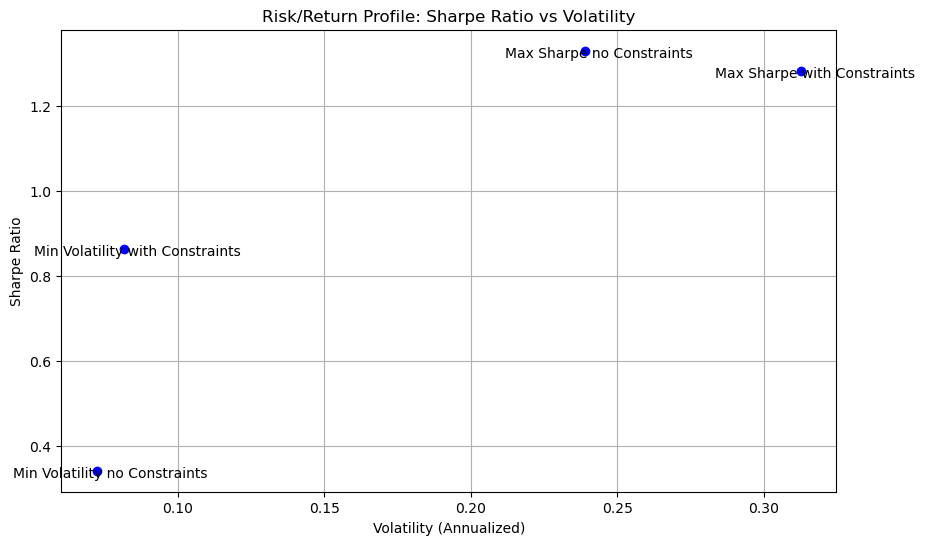

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe with Constraints': {
        'Bitcoin': 0.383237,
        'S&P 500': 0.392424,
        'Gold (GLD)': 0.156799,
        'US Gov Bond (TLT)': 0.067541
    },
    'Min Volatility with Constraints': {
        'Bitcoin': 0.051469,
        'S&P 500': 0.311998,
        'Gold (GLD)': 0.319113,
        'US Gov Bond (TLT)': 0.317421
    },
    'Max Sharpe no Constraints': {
        'Bitcoin': 0.280959,
        'S&P 500': 0.701165,
        'Gold (GLD)': 0.007473,
        'US Gov Bond (TLT)': 0.010403
    },
    'Min Volatility no Constraints': {
        'Bitcoin': 0.003194,
        'S&P 500': 0.334141,
        'Gold (GLD)': 0.378650,
        'US Gov Bond (TLT)': 0.284015
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Initialize portfolio metrics storage
    portfolio_metrics = {}

    # Risk-free rate for Sharpe Ratio calculation
    risk_free_rate = 0.0382 / 12  # Assuming 1% annual risk-free rate, convert to monthly

    # Backtest each portfolio
    initial_investment = 100000

    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Calculate portfolio cumulative returns
        portfolio_cumulative_returns = (1 + portfolio_monthly_returns).cumprod() - 1
        
        # Calculate key performance metrics
        cumulative_return = portfolio_cumulative_returns.iloc[-1]
        annualized_return = (1 + cumulative_return) ** (12 / len(portfolio_monthly_returns)) - 1
        volatility = portfolio_monthly_returns.std() * np.sqrt(12)  # Annualize volatility
        sharpe_ratio = (annualized_return - risk_free_rate * 12) / volatility
        
        # Store metrics
        portfolio_metrics[name] = {
            'Cumulative Return': cumulative_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio
        }

    # Display performance metrics
    metrics_df = pd.DataFrame(portfolio_metrics).T

    print(metrics_df)

    # Create a scatter plot for Sharpe Ratios vs Volatility
    plt.figure(figsize=(10, 6))
    plt.scatter(metrics_df['Volatility'], metrics_df['Sharpe Ratio'], color='blue')

    # Annotate the points
    for i in range(metrics_df.shape[0]):
        plt.annotate(metrics_df.index[i], 
                     (metrics_df['Volatility'][i], metrics_df['Sharpe Ratio'][i]), 
                     textcoords="offset points", 
                     xytext=(10,-5), 
                     ha='center')

    # Set plot labels and title
    plt.title('Risk/Return Profile: Sharpe Ratio vs Volatility')
    plt.xlabel('Volatility (Annualized)')
    plt.ylabel('Sharpe Ratio')
    plt.grid(True)
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Berke\AppData\Local\Temp\ipykernel_19452\3456840743.py:62: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('M').ffill().pct_change().dropna()


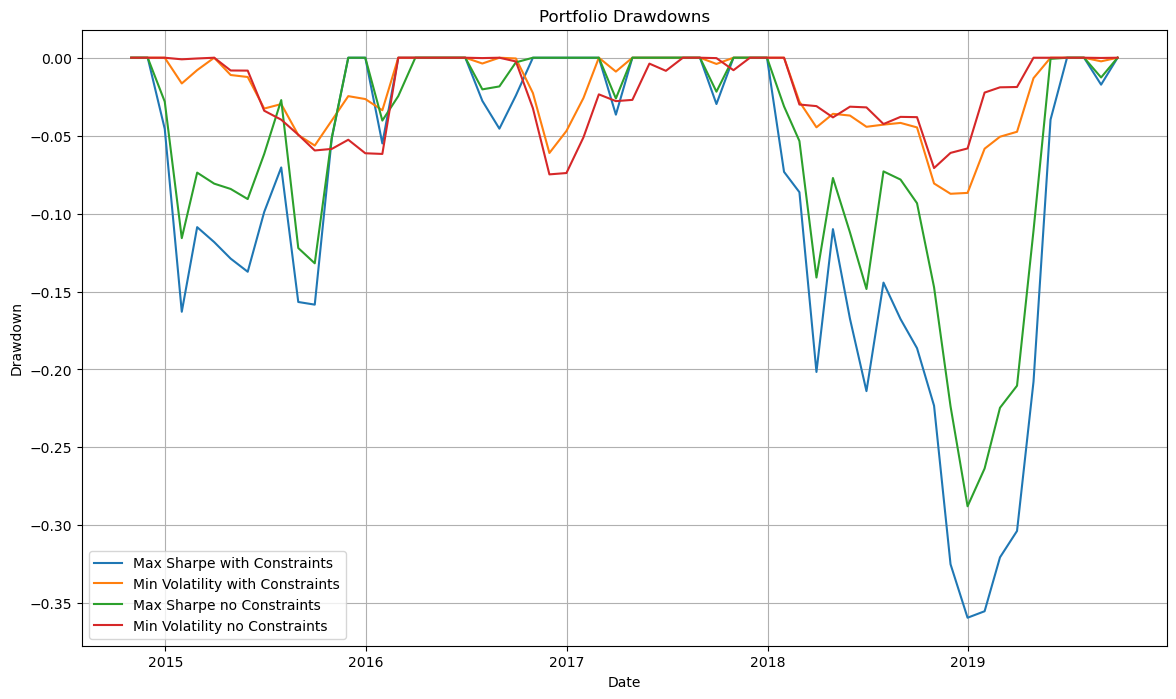

In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Portfolio Allocations
portfolios = {
    'Max Sharpe with Constraints': {
        'Bitcoin': 0.383237,
        'S&P 500': 0.392424,
        'Gold (GLD)': 0.156799,
        'US Gov Bond (TLT)': 0.067541
    },
    'Min Volatility with Constraints': {
        'Bitcoin': 0.051469,
        'S&P 500': 0.311998,
        'Gold (GLD)': 0.319113,
        'US Gov Bond (TLT)': 0.317421
    },
    'Max Sharpe no Constraints': {
        'Bitcoin': 0.280959,
        'S&P 500': 0.701165,
        'Gold (GLD)': 0.007473,
        'US Gov Bond (TLT)': 0.010403
    },
    'Min Volatility no Constraints': {
        'Bitcoin': 0.003194,
        'S&P 500': 0.334141,
        'Gold (GLD)': 0.378650,
        'US Gov Bond (TLT)': 0.284015
    }
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    if df.empty:
        print(f"Error: No data for {asset} ({ticker}) from {start_date} to {end_date}.")
    else:
        data[asset] = df

# If any asset has missing data, the program will stop
if len(data) != len(assets):
    print("Some assets do not have data for the full period. Please adjust the date range or assets.")
else:
    data = pd.DataFrame(data)

    # Calculate monthly returns
    monthly_returns = data.resample('M').ffill().pct_change().dropna()

    # Initialize a dictionary to store drawdown data
    drawdowns = {}

    # Backtest each portfolio
    for name, weights in portfolios.items():
        # Calculate portfolio returns
        portfolio_monthly_returns = (monthly_returns * list(weights.values())).sum(axis=1)
        
        # Calculate cumulative returns
        cumulative_returns = (1 + portfolio_monthly_returns).cumprod()

        # Calculate drawdown
        rolling_max = cumulative_returns.cummax()
        drawdown = (cumulative_returns - rolling_max) / rolling_max
        drawdowns[name] = drawdown

    # Convert drawdowns dictionary to DataFrame for easier plotting
    drawdown_df = pd.DataFrame(drawdowns)

    # Plot drawdowns
    plt.figure(figsize=(14, 8))
    for column in drawdown_df.columns:
        plt.plot(drawdown_df.index, drawdown_df[column], label=column)
    plt.title('Portfolio Drawdowns')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.show()


In [60]:
import yfinance as yf

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the time period for checking data availability
start_date = '2012-01-01'
end_date = '2017-01-01'

# Check data availability for each asset
for asset_name, ticker in assets.items():
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    print(f"{asset_name} ({ticker}) data starts from: {data.index.min()}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Bitcoin (BTC-USD) data starts from: 2014-09-17 00:00:00
S&P 500 (^GSPC) data starts from: 2012-01-03 00:00:00
Gold (GLD) (GLD) data starts from: 2012-01-03 00:00:00
US Gov Bond (TLT) (TLT) data starts from: 2012-01-03 00:00:00


# DATA STATISTIC
BACKTESTING

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the assets and their tickers
assets = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': '^GSPC',
    'Gold (GLD)': 'GLD',
    'US Gov Bond (TLT)': 'TLT'
}

# Define the time period for backtesting
start_date = '2014-09-20'
end_date = '2019-09-20'

# Download historical data for all assets
data = {}
for asset, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval='1d')['Close']
    data[asset] = df

# Convert to a DataFrame
data = pd.DataFrame(data)

# Display the number of observations and the frequency of the data points
print("Number of Observations per Asset:")
print(data.count())

print("\nFrequency of Data Points (Daily):")
print(data.resample('D').ffill().count())

# Check for missing data
missing_data = data.isnull().sum()
print("\nMissing Data Points per Asset:")
print(missing_data)

# Check for any anomalies such as extreme values (e.g., values beyond a certain number of standard deviations from the mean)
z_scores = np.abs((data - data.mean()) / data.std())
anomalies = z_scores > 3  # Flag anomalies as points that are more than 3 standard deviations from the mean
print("\nAnomalies Detected (Data Points > 3 Standard Deviations from Mean):")
print(anomalies.sum())

# Summarize potential limitations or biases
print("\nData Summary:")
print(f"Total Number of Days of Data Used: {len(data)}")
print("Potential Limitations or Biases:")
if missing_data.any():
    print(" - Missing data detected. This may introduce biases in the analysis.")
if anomalies.any().any():
    print(" - Anomalies detected. These extreme values may affect the results.")
if data.index[0] > pd.to_datetime(start_date):
    print(f" - Data for some assets does not start from {start_date}. This may lead to unequal comparisons across assets.")
if data.index[-1] < pd.to_datetime(end_date):
    print(f" - Data for some assets does not extend to {end_date}. This may lead to incomplete analysis.")

print("\nFirst and Last Date in the Dataset for Each Asset:")
for asset in assets.keys():
    print(f"{asset}: From {data[asset].first_valid_index()} to {data[asset].last_valid_index()}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Number of Observations per Asset:
Bitcoin              1826
S&P 500              1258
Gold (GLD)           1258
US Gov Bond (TLT)    1258
dtype: int64

Frequency of Data Points (Daily):
Bitcoin              1826
S&P 500              1258
Gold (GLD)           1258
US Gov Bond (TLT)    1258
dtype: int64

Missing Data Points per Asset:
Bitcoin                0
S&P 500              568
Gold (GLD)           568
US Gov Bond (TLT)    568
dtype: int64

Anomalies Detected (Data Points > 3 Standard Deviations from Mean):
Bitcoin              20
S&P 500               0
Gold (GLD)           15
US Gov Bond (TLT)    13
dtype: int64

Data Summary:
Total Number of Days of Data Used: 1826
Potential Limitations or Biases:
 - Missing data detected. This may introduce biases in the analysis.
 - Anomalies detected. These extreme values may affect the results.
 - Data for some assets does not extend to 2019-09-20. This may lead to incomplete analysis.

First and Last Date in the Dataset for Each Asset:
Bitc